<a href="https://colab.research.google.com/github/Pymadi369/Pymadi369/blob/main/credit_fraud_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

In [2]:
df = pd.read_csv("/content/creditcard_2023.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,16551,0.053538,-0.192585,0.461611,-1.306158,1.560699,2.163952,0.475827,0.070145,0.204921,...,-0.218509,-0.827751,-0.084792,2.180556,-0.142859,0.209628,0.084408,0.175205,23514.26,0.0
16552,16552,0.983077,-0.627611,1.149556,-0.704355,-0.171297,0.302900,0.165133,-0.100146,1.116743,...,-0.065315,0.255533,-0.034594,0.861064,0.003200,2.773614,-0.325247,-0.107647,2426.27,0.0
16553,16553,-0.061611,-0.091623,1.078409,-0.281171,0.209820,0.380416,0.517004,-0.017573,-0.021444,...,0.011591,0.621826,-0.067218,0.465388,-0.702954,-0.791506,-0.175370,0.100469,1782.40,0.0
16554,16554,-0.633840,-1.722528,1.029520,0.568713,-0.571390,2.028620,2.365354,-0.083855,-0.392475,...,0.250170,0.109892,3.391397,-0.814809,0.305489,0.412921,-0.595300,0.349859,21135.15,0.0


In [3]:
df.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [4]:
df.tail(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16551,16551,0.053538,-0.192585,0.461611,-1.306158,1.560699,2.163952,0.475827,0.070145,0.204921,...,-0.218509,-0.827751,-0.084792,2.180556,-0.142859,0.209628,0.084408,0.175205,23514.26,0.0
16552,16552,0.983077,-0.627611,1.149556,-0.704355,-0.171297,0.302900,0.165133,-0.100146,1.116743,...,-0.065315,0.255533,-0.034594,0.861064,0.003200,2.773614,-0.325247,-0.107647,2426.27,0.0
16553,16553,-0.061611,-0.091623,1.078409,-0.281171,0.209820,0.380416,0.517004,-0.017573,-0.021444,...,0.011591,0.621826,-0.067218,0.465388,-0.702954,-0.791506,-0.175370,0.100469,1782.40,0.0
16554,16554,-0.633840,-1.722528,1.029520,0.568713,-0.571390,2.028620,2.365354,-0.083855,-0.392475,...,0.250170,0.109892,3.391397,-0.814809,0.305489,0.412921,-0.595300,0.349859,21135.15,0.0
16555,16555,-0.436610,-2.988172,0.199322,-0.028523,-0.451047,1.266839,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16556, 31)

In [9]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16555.000000,16555.000000,16555.000000,...,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.00000
mean,8277.500000,0.310435,-0.390444,1.126546,-0.599439,0.278531,0.496219,0.432771,-0.141779,1.158619,...,-0.133802,-0.167279,-0.051091,0.147614,0.126560,-0.005220,-0.195601,-0.085898,11899.298669,0.00447
std,4779.449864,0.623223,0.580495,0.740634,0.671738,0.701750,0.734879,0.469101,0.281599,0.961426,...,0.307911,0.556464,0.524728,1.092078,0.709908,1.198799,0.458765,0.607796,6929.462259,0.06671
min,0.000000,-2.543593,-25.480046,-2.361764,-4.468314,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,...,-5.775451,-6.262872,-19.297443,-3.674306,-10.230967,-3.733169,-5.536809,-8.923980,50.410000,0.00000
25%,4138.750000,-0.152714,-0.546107,0.662282,-0.950712,0.006020,0.094125,0.248297,-0.192263,0.497624,...,-0.211975,-0.537118,-0.197402,-0.568236,-0.308334,-0.845196,-0.320118,-0.131012,5880.225000,0.00000
50%,8277.500000,0.067367,-0.363235,1.036472,-0.519703,0.183322,0.381168,0.406251,-0.148212,1.047952,...,-0.153475,-0.156160,-0.068991,0.154813,0.173206,-0.048178,-0.236155,-0.057026,11769.560000,0.00000
75%,12416.250000,0.960483,-0.163715,1.544321,-0.152398,0.399323,0.752987,0.597917,-0.090634,1.624862,...,-0.090576,0.176650,0.050278,0.837140,0.572464,0.775311,-0.121824,0.084762,17917.800000,0.00000
max,16555.000000,1.695400,3.007339,4.440555,2.360359,41.540257,9.295606,37.922674,5.135410,12.171681,...,6.834415,4.929620,18.418155,9.978778,10.424231,5.623285,17.987212,11.375357,24039.880000,1.00000


In [11]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values (if applicable)
df.dropna(inplace=True)


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


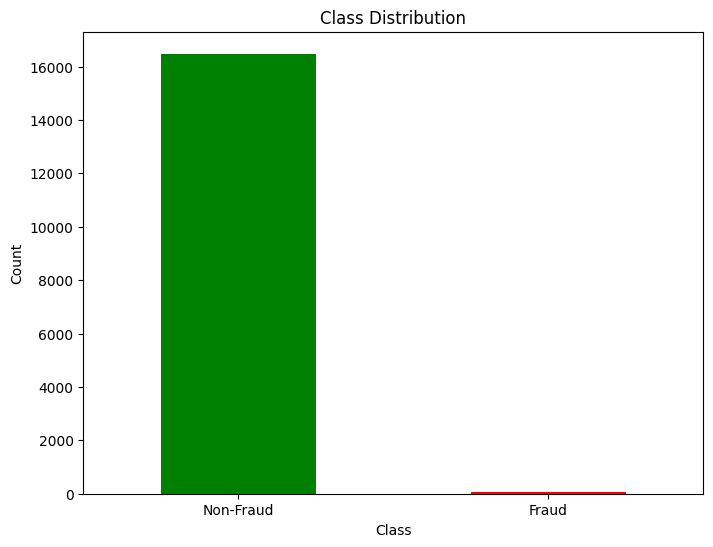

In [12]:
import matplotlib.pyplot as plt

# Visualize class distribution
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()


here the distribution of class is imbalanced then we will use sampling technique

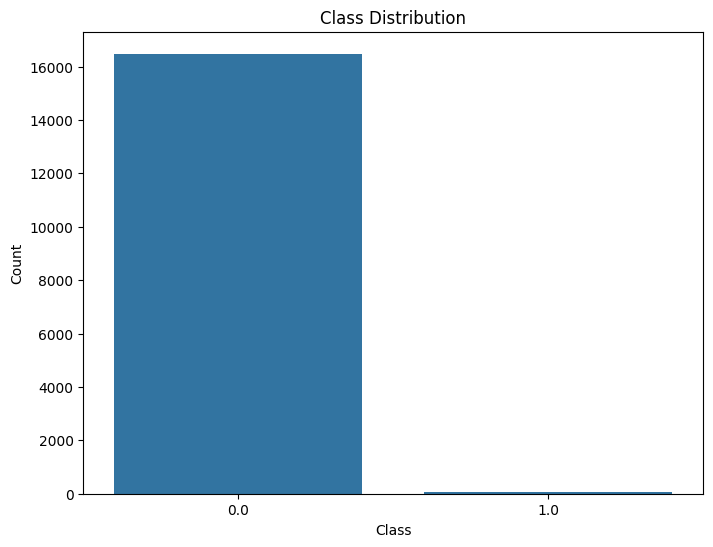

In [16]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

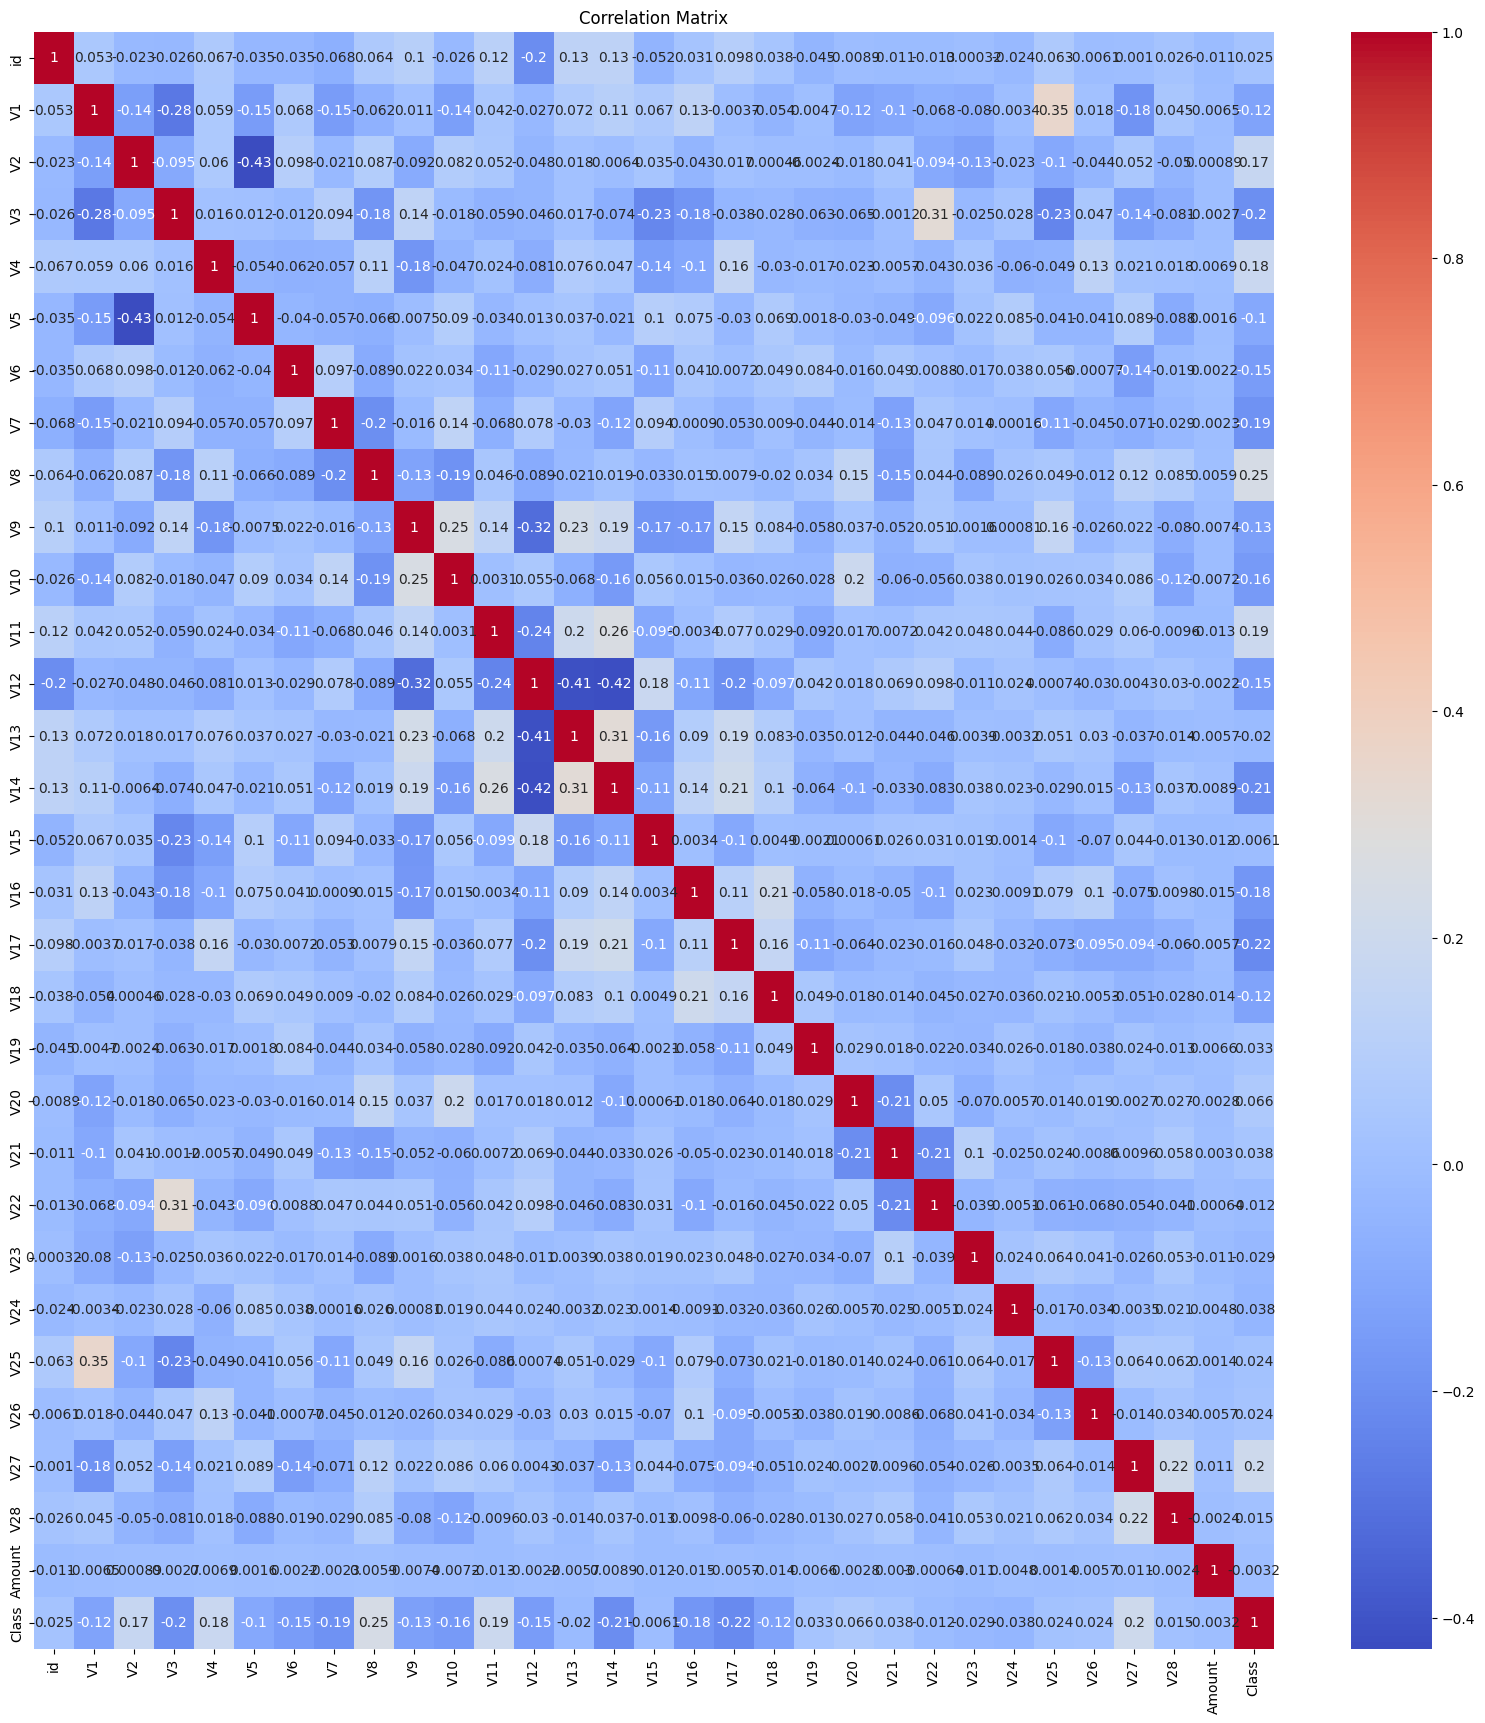

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(20,21))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


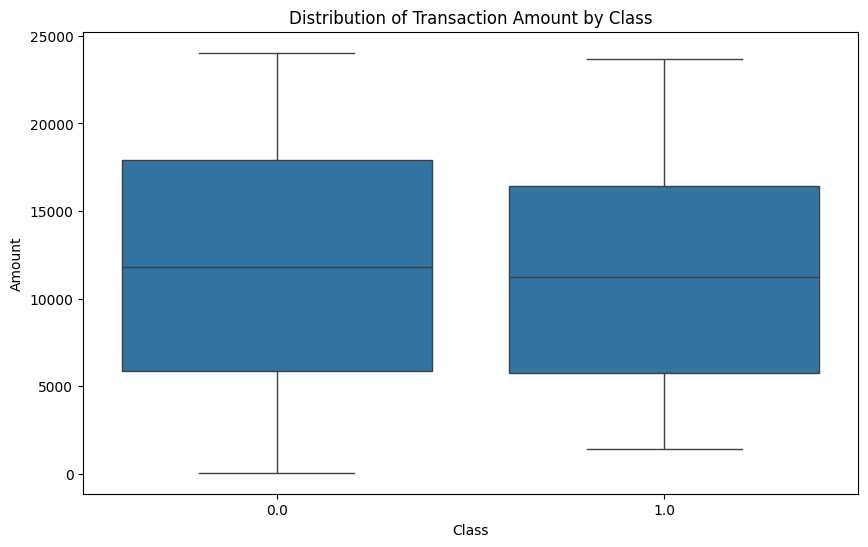

In [20]:
# Visualize distribution of transaction amount for both classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the dataset into features (X) and labels (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# applying oversampling technique SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [21]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9411764705882353
Recall: 0.8421052631578947
F1 Score: 0.8888888888888888


In [26]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for n_estimators
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 100}


The model achieves high precision (94.12%), indicating that when it flags a transaction as fraudulent, it is correct in the majority of cases.

The recall rate (84.21%) indicates the model captures a significant portion of actual fraudulent transactions, but there's room for improvement in identifying more fraud cases.

The F1-score (88.89%) suggests a balance between precision and recall, indicating overall good performance, but further optimization may enhance the model's ability to detect fraud.

While the model performs well in identifying fraudulent transactions accurately, efforts to improve recall can help capture more instances of fraud, enhancing the overall effectiveness of the fraud detection system.